<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">


# <center> **PROYECTO IA1** </center>


## **Integrantes:**
1. **Daniel Leonardo Aguilar Navas - 2230034**
2. **Juan José Ardila Aragón - 2230035**



In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Lee el dataframe y muestra los primeros datos.
dataframe_obesity = pd.read_csv("https://docs.google.com/spreadsheets/d/1kYg9omIXr_Kq4KqQMgnMyK8MG6I7LmWHLyfyM7Ofspk/export?format=csv")
dataframe_obesity.head()


Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [ ]:
#@title Cambio de nombre de columnas para comodidad
dataframe_obesity.columns = [
    'GENERO', 'EDAD', 'ALTURA', 'PESO', 'HIS_FAM', 'C_CALORICA', 'F_VEG',
    'F_COMIDAS', 'CAEC', 'FUMA', 'CH2O', 'MONI_CAL', 'F_EJE', 'T_TEC',
    'F_ALC', 'M_TRANS', 'OBESITY_LEVEL'
]
df_obesity=dataframe_obesity.copy()


# Convertir las columnas categóricas en valores numéricos
for col in df_obesity.select_dtypes(include=['object']).columns:
    df_obesity[col] = pd.factorize(df_obesity[col])[0]

In [ ]:
df_obesity

GENERO       EDAD    ALTURA        PESO  HIS_FAM  C_CALORICA  F_VEG  \
0          0  21.000000  1.620000   64.000000        0           0    2.0   
1          0  21.000000  1.520000   56.000000        0           0    3.0   
2          1  23.000000  1.800000   77.000000        0           0    2.0   
3          1  27.000000  1.800000   87.000000        1           0    3.0   
4          1  22.000000  1.780000   89.800000        1           0    2.0   
...      ...        ...       ...         ...      ...         ...    ...   
2106       0  20.976842  1.710730  131.408528        0           1    3.0   
2107       0  21.982942  1.748584  133.742943        0           1    3.0   
2108       0  22.524036  1.752206  133.689352        0           1    3.0   
2109       0  24.361936  1.739450  133.346641        0           1    3.0   
2110       0  23.664709  1.738836  133.472641        0           1    3.0   

      F_COMIDAS  CAEC  FUMA      CH2O  MONI_CAL     F_EJE     T_TEC  F_ALC  \
0           3.0     0     0  2.000000         0  0.000000  1.000000      0   
1           3.0     0     1  3.000000         1  3.000000  0.000000      1   
2           3.0     0     0  2.000000         0  2.000000  1.000000      2   
3           3.0     0     0  2.000000         0  2.000000  0.000000      2   
4           1.0     0     0  2.000000         0  0.000000  0.000000      1   
...         ...   ...   ...       ...       ...       ...       ...    ...   
2106        3.0     0     0  1.728139         0  1.676269  0.906247      1   
2107        3.0     0     0  2.005130         0  1.341390  0.599270      1   
2108        3.0     0     0  2.054193         0  1.414209  0.646288      1   
2109        3.0     0     0  2.852339         0  1.139107  0.586035      1   
2110        3.0     0     0  2.863513         0  1.026452  0.714137      1   

      M_TRANS  OBESITY_LEVEL  
0           0              0  
1           0              0  
2           0              0  
3           1              1  
4           0              2  
...       ...            ...  
2106        0              6  
2107        0              6  
2108        0              6  
2109        0              6  
2110        0              6  

[2111 rows x 17 columns]

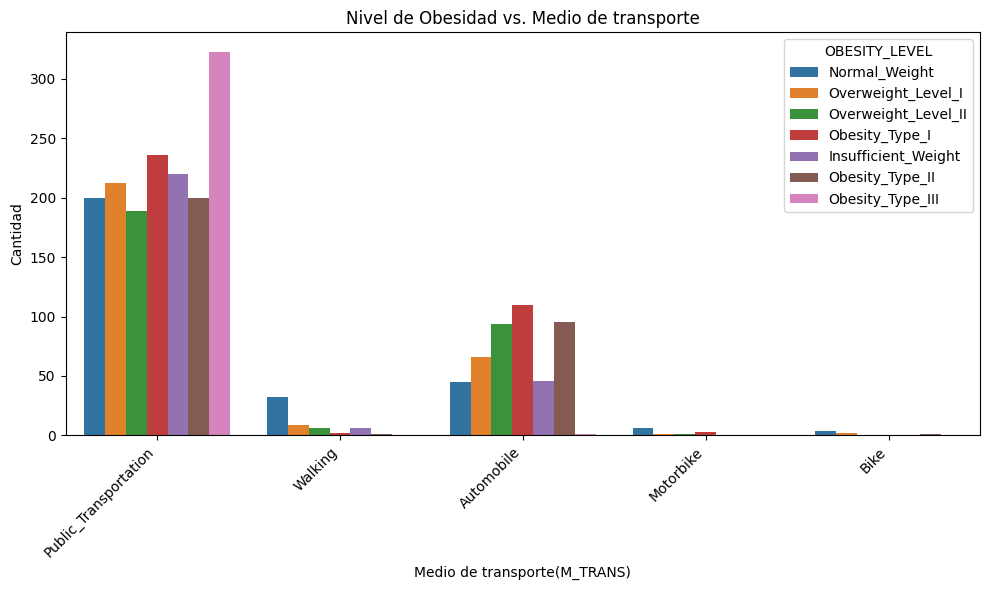

In [ ]:
#@title Gráfica nivel de OBESITY_LEVEL vs MTRANS

import matplotlib.pyplot as plt
import seaborn as sns

# Create the countplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(data=dataframe_obesity, x='M_TRANS', hue='OBESITY_LEVEL')
plt.title('Nivel de Obesidad vs. Medio de transporte')
plt.xlabel('Medio de transporte(M_TRANS)')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
df_obesity.describe()

GENERO         EDAD       ALTURA         PESO      HIS_FAM  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058     0.182378   
std       0.500083     6.345968     0.093305    26.191172     0.386247   
min       0.000000    14.000000     1.450000    39.000000     0.000000   
25%       0.000000    19.947192     1.630000    65.473343     0.000000   
50%       1.000000    22.777890     1.700499    83.000000     0.000000   
75%       1.000000    26.000000     1.768464   107.430682     0.000000   
max       1.000000    61.000000     1.980000   173.000000     1.000000   

        C_CALORICA        F_VEG    F_COMIDAS         CAEC         FUMA  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.883941     2.419043     2.685628     0.237328     0.020843   
std       0.320371     0.533927     0.778039     0.613474     0.142893   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%       1.000000     2.000000     2.658738     0.000000     0.000000   
50%       1.000000     2.385502     3.000000     0.000000     0.000000   
75%       1.000000     3.000000     3.000000     0.000000     0.000000   
max       1.000000     3.000000     4.000000     3.000000     1.000000   

              CH2O     MONI_CAL        F_EJE        T_TEC        F_ALC  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      2.008011     0.045476     1.010298     0.657866     0.731407   
std       0.612953     0.208395     0.850592     0.608927     0.515498   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.584812     0.000000     0.124505     0.000000     0.000000   
50%       2.000000     0.000000     1.000000     0.625350     1.000000   
75%       2.477420     0.000000     1.666678     1.000000     1.000000   
max       3.000000     1.000000     3.000000     2.000000     3.000000   

           M_TRANS  OBESITY_LEVEL  
count  2111.000000    2111.000000  
mean      0.488394       3.050687  
std       0.868475       1.995680  
min       0.000000       0.000000  
25%       0.000000       1.000000  
50%       0.000000       3.000000  
75%       1.000000       5.000000  
max       4.000000       6.000000

In [ ]:
df_obesity['IMC']=df_obesity.PESO/ df_obesity.ALTURA**2
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GENERO         2111 non-null   int64  
 1   EDAD           2111 non-null   float64
 2   ALTURA         2111 non-null   float64
 3   PESO           2111 non-null   float64
 4   HIS_FAM        2111 non-null   int64  
 5   C_CALORICA     2111 non-null   int64  
 6   F_VEG          2111 non-null   float64
 7   F_COMIDAS      2111 non-null   float64
 8   CAEC           2111 non-null   int64  
 9   FUMA           2111 non-null   int64  
 10  CH2O           2111 non-null   float64
 11  MONI_CAL       2111 non-null   int64  
 12  F_EJE          2111 non-null   float64
 13  T_TEC          2111 non-null   float64
 14  F_ALC          2111 non-null   int64  
 15  M_TRANS        2111 non-null   int64  
 16  OBESITY_LEVEL  2111 non-null   int64  
 17  IMC            2111 non-null   float64
dtypes: float

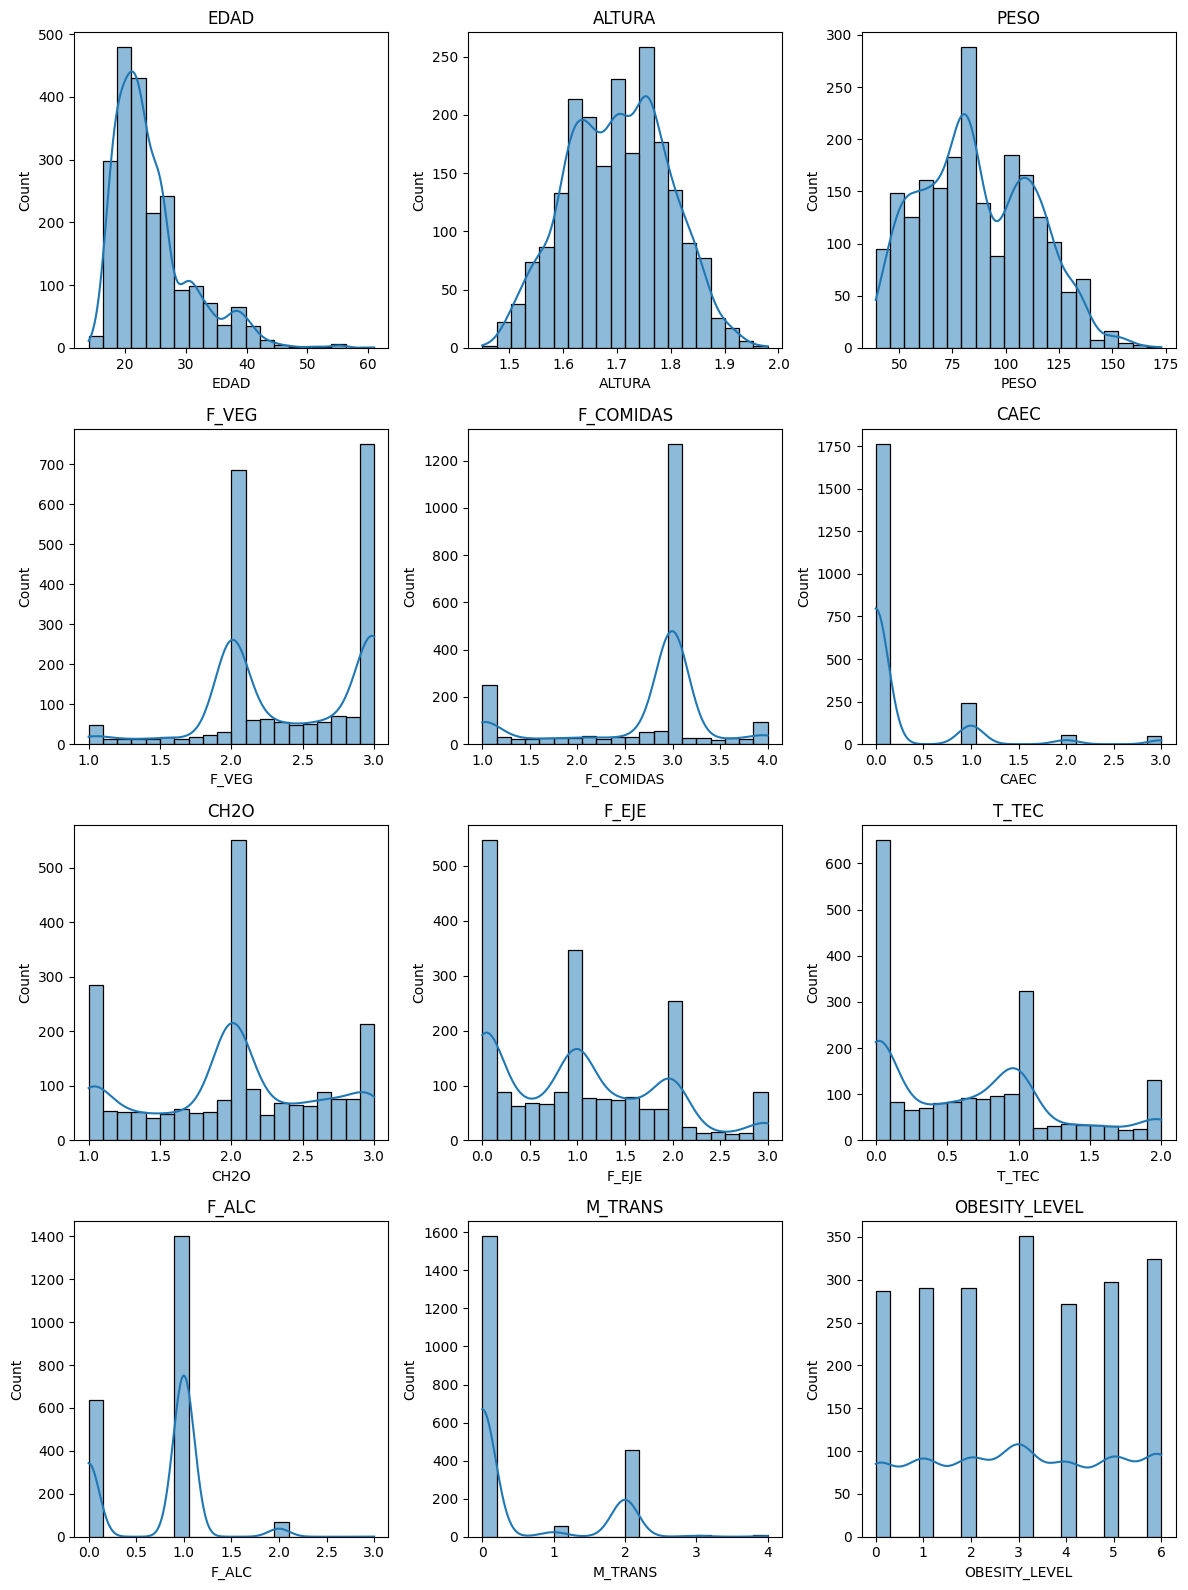

In [ ]:
#@title Histograma de las columnas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas a graficar en mayúsculas
num_cols = np.array([
    'EDAD', 'ALTURA', 'PESO', 'F_VEG', 'F_COMIDAS',
    'CAEC', 'CH2O', 'F_EJE', 'T_TEC', 'F_ALC', 'M_TRANS', 'OBESITY_LEVEL'
])

num_rows = int(np.ceil(len(num_cols) / 3))

# Crear la figura con subgráficos
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))

# Convertir la matriz de ejes a una lista
ejes = axes.ravel()

# Graficar histogramas para cada columna
for i, col in enumerate(num_cols):
    sns.histplot(df_obesity[col], bins=20, kde=True, ax=ejes[i])
    ejes[i].set_title(col)

# Ocultar subplots vacíos (si hay)
for i in range(len(num_cols), len(ejes)):
    ejes[i].set_visible(False)

plt.tight_layout()
plt.show()


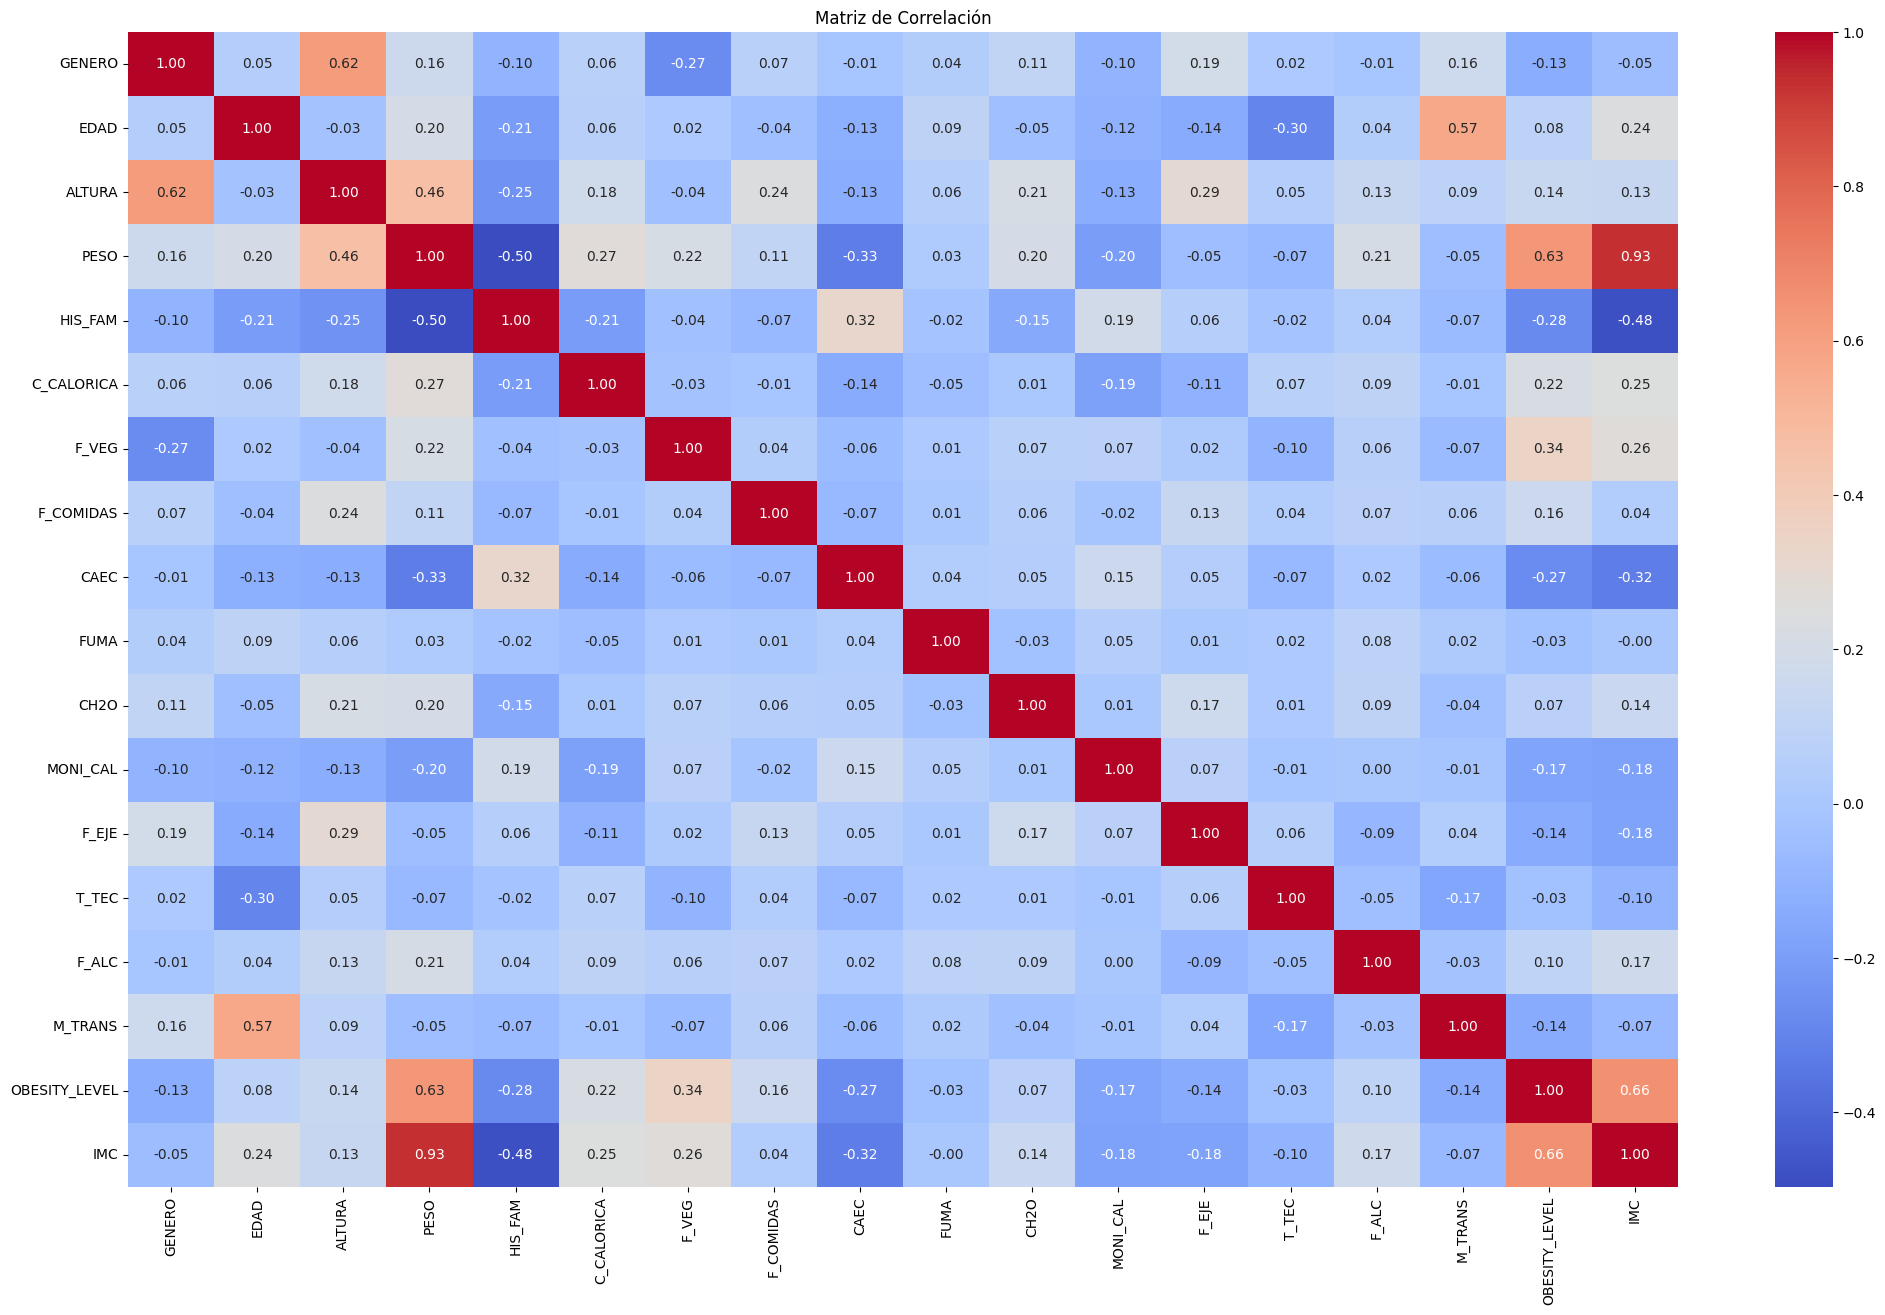

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular la correlacion
corr = df_obesity.corr()
# Graficar
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

PESO - Media analítica: 86.586
PESO - Media empírica: 86.586
PESO - P(X > Media + 1σ) analítico: 0.159
PESO - P(X > Media + 1σ) empírico: 0.179
--------------------------------------------------
EDAD - Media analítica: 24.313
EDAD - Media empírica: 24.313
EDAD - P(X > Media + 1σ) analítico: 0.159
EDAD - P(X > Media + 1σ) empírico: 0.150
--------------------------------------------------
ALTURA - Media analítica: 1.702
ALTURA - Media empírica: 1.702
ALTURA - P(X > Media + 1σ) analítico: 0.159
ALTURA - P(X > Media + 1σ) empírico: 0.167
--------------------------------------------------


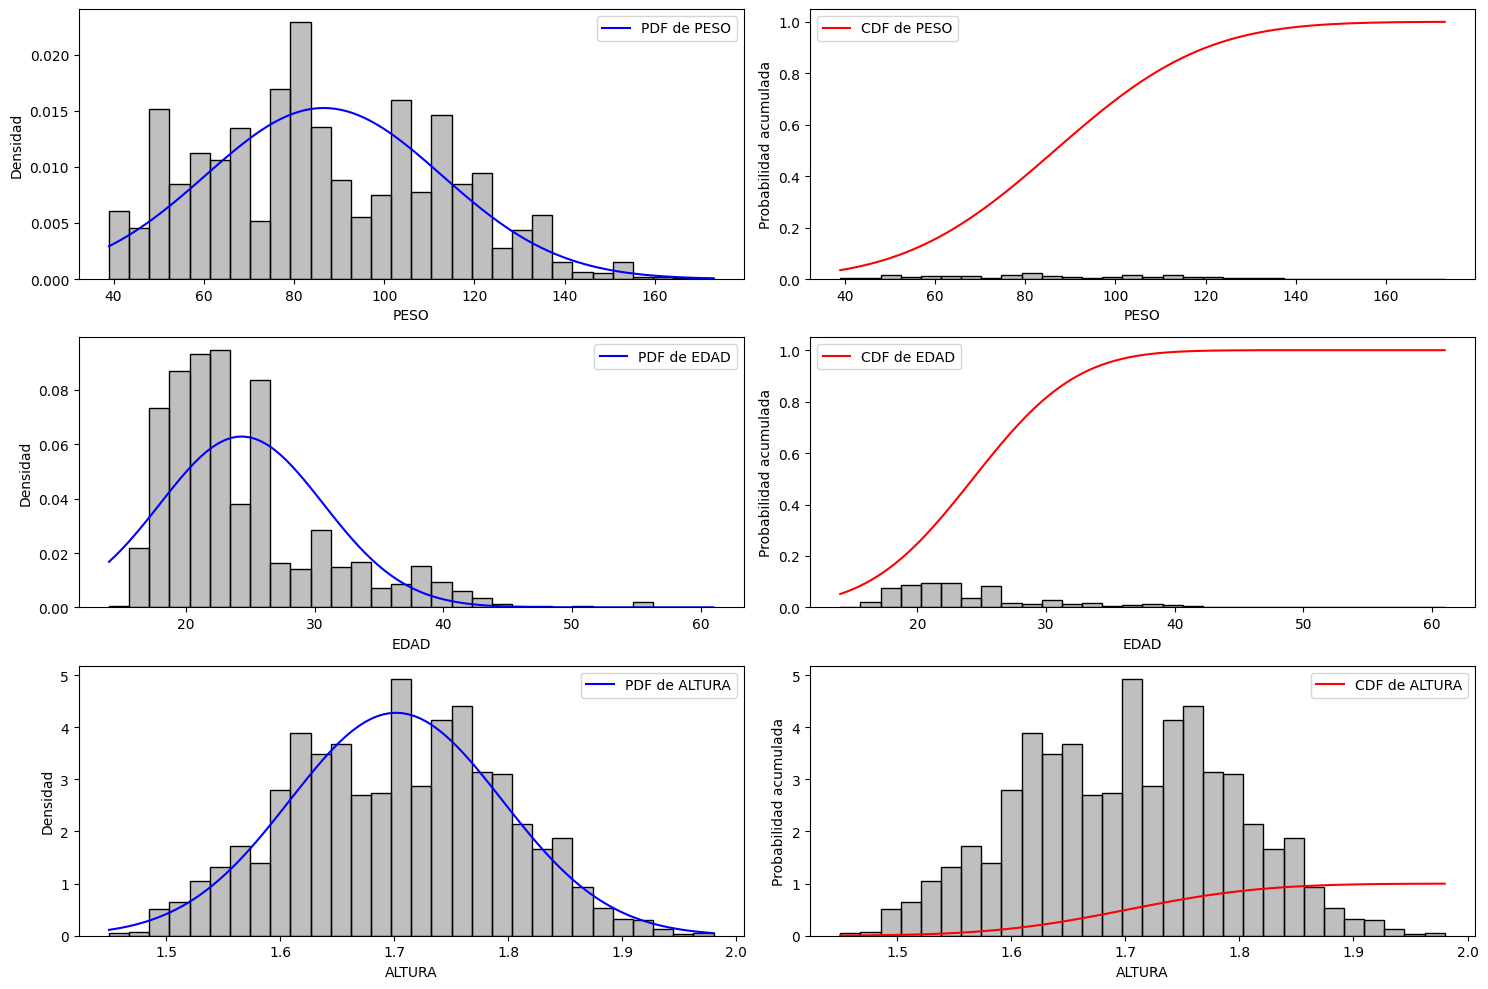

In [ ]:
# @title **PDF y CDF (peso, edad, altuura)**
# CDF = cumulative distribution function
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a analizar
variables = ["PESO", "EDAD", "ALTURA"]

# Crear figuras
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    data_var = df_obesity[var]

    # Distribución normal con media y desviación estándar
    data_dist = stats.norm(loc=np.mean(data_var), scale=np.std(data_var))

    # Espaciado para PDF y CDF
    t = np.linspace(np.min(data_var), np.max(data_var), 100)

    # PDF
    plt.subplot(len(variables), 2, 2 * i + 1)
    plt.plot(t, data_dist.pdf(t), label=f"PDF de {var}", color="blue")
    sns.histplot(data_var, color='gray', bins=30, stat='density', kde=False, alpha=0.5)
    plt.xlabel(var)
    plt.ylabel("Densidad")
    plt.legend()

    # CDF
    plt.subplot(len(variables), 2, 2 * i + 2)
    sns.histplot(data_var, color='gray', bins=30, stat='density', kde=False, alpha=0.5)
    plt.plot(t, data_dist.cdf(t), label=f"CDF de {var}", color="red")
    plt.xlabel(var)
    plt.ylabel("Probabilidad acumulada")
    plt.legend()

    # Resultados analíticos y empíricos
    print(f"{var} - Media analítica: {data_dist.mean():.3f}")
    print(f"{var} - Media empírica: {np.mean(data_var):.3f}")
    print(f"{var} - P(X > Media + 1σ) analítico: {1 - data_dist.cdf(np.mean(data_var) + np.std(data_var)):.3f}")
    print(f"{var} - P(X > Media + 1σ) empírico: {np.mean(data_var > (np.mean(data_var) + np.std(data_var))):.3f}")
    print("-"*50)

plt.tight_layout()
plt.show()


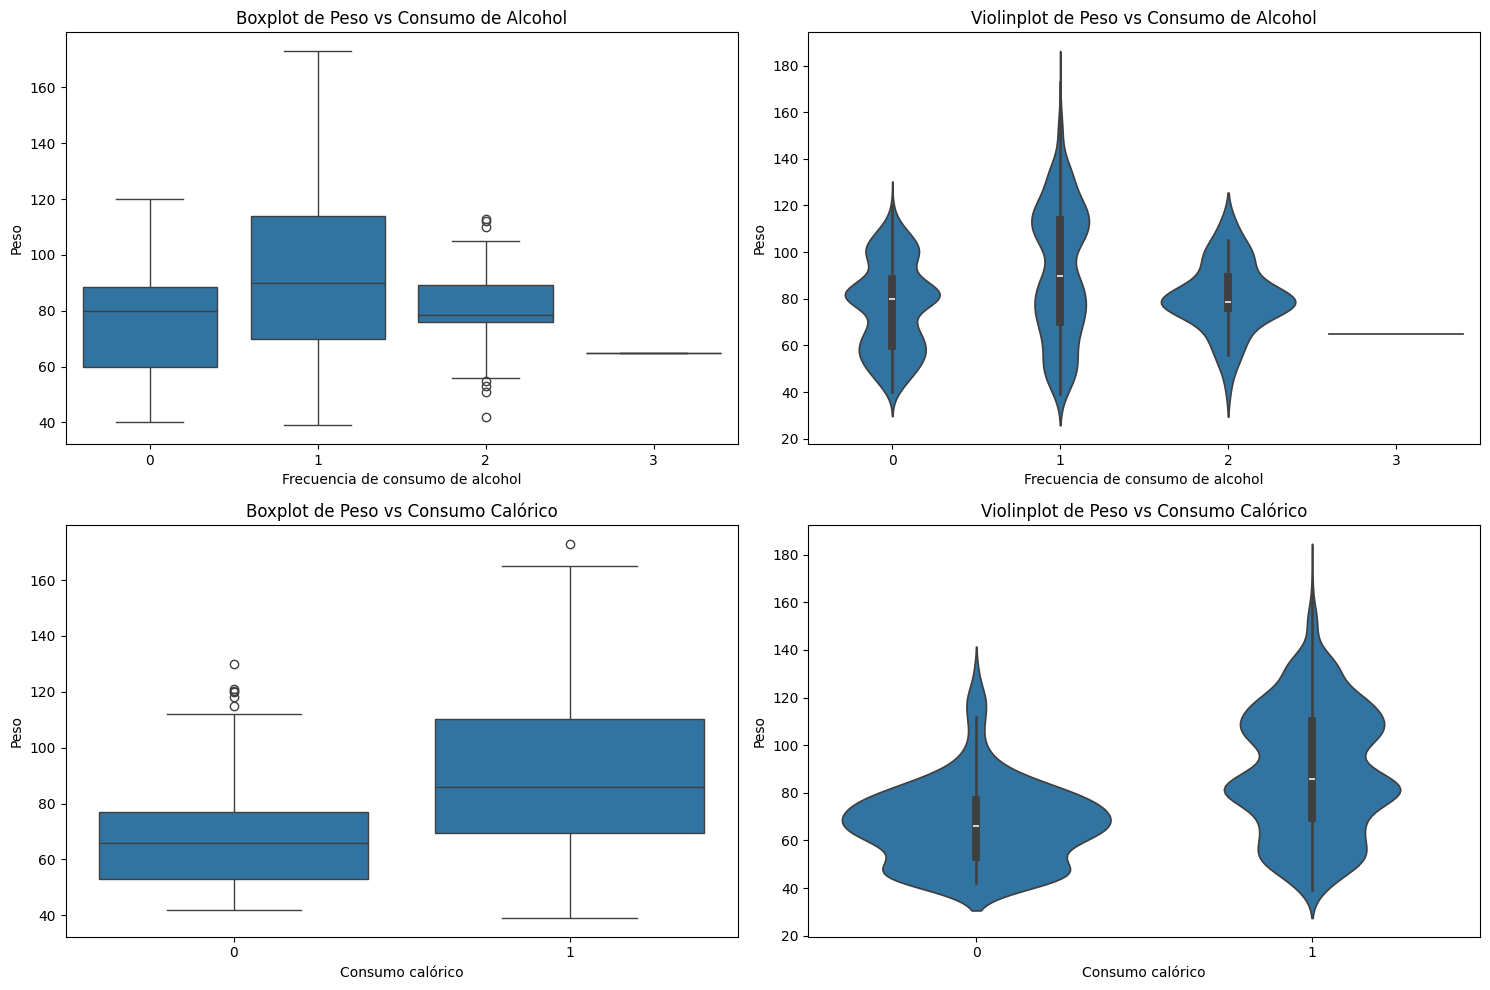

In [ ]:
# @title Boxplot y Violinplot (PESO vs F_ALC) (ESO vs C_CALORICA)
plt.figure(figsize=(15, 10))

# Boxplot y Violinplot para PESO vs F_ALC (Frecuencia de consumo de alcohol)
plt.subplot(2, 2, 1)
sns.boxplot(x="F_ALC", y="PESO", data=df_obesity)
plt.xlabel("Frecuencia de consumo de alcohol")
plt.ylabel("Peso")
plt.title("Boxplot de Peso vs Consumo de Alcohol")

plt.subplot(2, 2, 2)
sns.violinplot(x="F_ALC", y="PESO", data=df_obesity)
plt.xlabel("Frecuencia de consumo de alcohol")
plt.ylabel("Peso")
plt.title("Violinplot de Peso vs Consumo de Alcohol")

# Boxplot y Violinplot para PESO vs C_CALORICA (Consumo calórico)
plt.subplot(2, 2, 3)
sns.boxplot(x="C_CALORICA", y="PESO", data=df_obesity)
plt.xlabel("Consumo calórico")
plt.ylabel("Peso")
plt.title("Boxplot de Peso vs Consumo Calórico")

plt.subplot(2, 2, 4)
sns.violinplot(x="C_CALORICA", y="PESO", data=df_obesity)
plt.xlabel("Consumo calórico")
plt.ylabel("Peso")
plt.title("Violinplot de Peso vs Consumo Calórico")

plt.tight_layout()
plt.show()



# Algoritmo Genético:
Estructura del algoritmo:


1.  **Inicialización:** Se selecciona una población aleatoria de individuos del dataset.

2.   **Fitness Function:** Evalúa la salud de cada individuo con base en condiciones como IMC, consumo de calorías, ejercicio, etc.

3. **Selección:** Se eligen los mejores individuos en cada generación.

4. **Crossover:** Se combinan características de los individuos seleccionados.

5. **Mutación:** Se introducen cambios aleatorios en algunos individuos.

6. **Reducción de Población:** Se mantiene la mejor mitad de los individuos para la siguiente generación.

7. **Resultado:**
 Se obtiene un vector con los índices de las mejores condiciones del dataset.

In [ ]:
import numpy as np
import pandas as pd
import random

#@title Algoritmo Genético para Selección de Condiciones Saludables

# Función de aptitud basada en IMC, ejercicio y consumo calórico
def fitness(individual):
    imc = individual["IMC"]
    ejercicio = individual["F_EJE"]
    calorias = individual["C_CALORICA"]

    return max(0, 100 - abs(imc - 22) * 10 + ejercicio * 5 - (calorias / 500))
    # Asegura valores positivos, fomenta peso saludable y ejercicio

# Inicializar población aleatoria
def initialize_population(df, size):
    return random.sample(list(df.index), size)

# Selección basada en fitness
def selection(df, population):
    scored = sorted(population, key=lambda i: fitness(df.loc[i]), reverse=True)
    return scored[:max(1, len(scored) // 2)]  # Asegura al menos un individuo

# Crossover entre individuos seleccionados
def crossover(parents):
    offspring = []
    for _ in range(len(parents) // 2):
        p1, p2 = random.sample(parents, 2)
        offspring.append(random.choice([p1, p2]))
    return parents + offspring

# Mutación aleatoria
def mutation(population, df, mutation_rate=0.1):
    for i in range(len(population)):
        if random.random() < mutation_rate:
            population[i] = random.choice(df.index)
    return population

# Algoritmo genético principal
def genetic_algorithm(df, generations=10, population_size=50):
    population = initialize_population(df, population_size)
    for _ in range(generations):
        selected = selection(df, population)
        crossed = crossover(selected)
        mutated = mutation(crossed, df)
        population = selection(df, mutated)  # Reducimos la población a la mejor mitad
    return population

# Ejecutar algoritmo genético
best_conditions = genetic_algorithm(df_obesity)
print("Índices de las mejores condiciones de salud:", best_conditions)
print(df_obesity.loc[best_conditions])


Índices de las mejores condiciones de salud: [287]
     GENERO  EDAD  ALTURA  PESO  HIS_FAM  C_CALORICA  F_VEG  F_COMIDAS  CAEC  \
287       0  18.0     1.6  58.0        0           1    2.0        3.0     0   

     FUMA  CH2O  MONI_CAL  F_EJE  T_TEC  F_ALC  M_TRANS  OBESITY_LEVEL  \
287     0   3.0         0    3.0    0.0      0        0              0   

          IMC  
287  22.65625  


# Segunda entrega


# Clasificación por RandomForest


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

columnas = ['ALTURA', 'HIS_FAM', 'C_CALORICA', 'F_VEG', 'CAEC', 'CH2O', 'MONI_CAL', 'F_ALC', 'F_EJE', 'OBESITY_LEVEL']
df_seleccionado = df_obesity[columnas]

X = df_seleccionado.iloc[:, :-1].values.astype(float)  # asegurar float
y = df_seleccionado['OBESITY_LEVEL'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

depths = [3, 5, 7, 10, 15]

for depth in depths:
    train_accuracies = []
    train_f1_scores = []
    train_recalls = []

    test_accuracies = []
    test_f1_scores = []
    test_recalls = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(max_depth=depth, random_state=42, criterion="gini")
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Métricas train
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        train_f1_scores.append(f1_score(y_train, y_train_pred, average='weighted'))
        train_recalls.append(recall_score(y_train, y_train_pred, average='weighted'))

        # Métricas test
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        test_f1_scores.append(f1_score(y_test, y_test_pred, average='weighted'))
        test_recalls.append(recall_score(y_test, y_test_pred, average='weighted'))

    print(f"\n--- Profundidad del árbol: {depth} ---")
    print(f"Train Accuracy promedio: {np.mean(train_accuracies):.4f} ± {np.std(train_accuracies):.4f}")
    print(f"Train F1 Score promedio: {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
    print(f"Train Recall promedio: {np.mean(train_recalls):.4f} ± {np.std(train_recalls):.4f}")

    print(f"Test Accuracy promedio: {np.mean(test_accuracies):.4f} ± {np.std(test_accuracies):.4f}")
    print(f"Test F1 Score promedio: {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
    print(f"Test Recall promedio: {np.mean(test_recalls):.4f} ± {np.std(test_recalls):.4f}")




--- Profundidad del árbol: 3 ---
Train Accuracy promedio: 0.5573 ± 0.0065
Train F1 Score promedio: 0.5118 ± 0.0093
Train Recall promedio: 0.5573 ± 0.0065
Test Accuracy promedio: 0.5395 ± 0.0362
Test F1 Score promedio: 0.4936 ± 0.0406
Test Recall promedio: 0.5395 ± 0.0362

--- Profundidad del árbol: 5 ---
Train Accuracy promedio: 0.6571 ± 0.0062
Train F1 Score promedio: 0.6229 ± 0.0068
Train Recall promedio: 0.6571 ± 0.0062
Test Accuracy promedio: 0.6215 ± 0.0391
Test F1 Score promedio: 0.5847 ± 0.0427
Test Recall promedio: 0.6215 ± 0.0391

--- Profundidad del árbol: 7 ---
Train Accuracy promedio: 0.7736 ± 0.0050
Train F1 Score promedio: 0.7648 ± 0.0060
Train Recall promedio: 0.7736 ± 0.0050
Test Accuracy promedio: 0.6854 ± 0.0332
Test F1 Score promedio: 0.6692 ± 0.0353
Test Recall promedio: 0.6854 ± 0.0332

--- Profundidad del árbol: 10 ---
Train Accuracy promedio: 0.9134 ± 0.0042
Train F1 Score promedio: 0.9129 ± 0.0042
Train Recall promedio: 0.9134 ± 0.0042
Test Accuracy promedio: 0

# Clasificación por SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
import numpy as np
import pandas as pd

# COLUMNAS DATAFRAME
columnas = ['ALTURA','HIS_FAM', 'C_CALORICA', 'F_VEG', 'CAEC', 'CH2O', 'MONI_CAL', 'F_ALC', 'F_EJE', 'OBESITY_LEVEL']
df_seleccionado = df_obesity[columnas]
X = df_seleccionado.values[:, :-1]
y = df_seleccionado['OBESITY_LEVEL'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
est = SVC(kernel='poly', decision_function_shape='ovr', degree=6, random_state=22)
kf = KFold(n_splits=10, shuffle=True, random_state=42)


accuracies = []
f1_scores = []
recalls = []

y_true_total = []
y_pred_total = []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k = X_train[train_index], X_train[test_index]
    y_train_k, y_test_k = y_train[train_index], y_train[test_index]

    est.fit(X_train_k, y_train_k)
    y_pred_k = est.predict(X_test_k)

    accuracies.append(accuracy_score(y_test_k, y_pred_k))
    f1_scores.append(f1_score(y_test_k, y_pred_k, average='weighted'))
    recalls.append(recall_score(y_test_k, y_pred_k, average='weighted'))

    y_true_total.extend(y_test_k)
    y_pred_total.extend(y_pred_k)


print("\n📊 Métricas promedio con desviación estándar:")
print(f"Accuracy promedio: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"F1-score promedio (ponderado): {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Recall promedio (ponderado): {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")


print("\n📋 Reporte de clasificación tras K-Fold con SVC:\n")
print(classification_report(y_true_total, y_pred_total))


📊 Métricas promedio con desviación estándar:
Accuracy promedio: 0.6096 ± 0.0259
F1-score promedio (ponderado): 0.5948 ± 0.0311
Recall promedio (ponderado): 0.6096 ± 0.0259

📋 Reporte de clasificación tras K-Fold con SVC:

              precision    recall  f1-score   support

           0       0.49      0.43      0.45       235
           1       0.52      0.37      0.43       237
           2       0.54      0.35      0.42       235
           3       0.53      0.62      0.57       292
           4       0.69      0.65      0.67       207
           5       0.59      0.86      0.70       233
           6       0.84      0.98      0.90       249

    accuracy                           0.61      1688
   macro avg       0.60      0.61      0.59      1688
weighted avg       0.60      0.61      0.59      1688



# metricas

## Accuracy:
mide la proporción de predicciones correctas sobre el total.
Un valor cercano a 1 (o 100 %) indica que el modelo acierta la gran mayoría de las veces.

## Recall
 (weighted): mide qué tan bien el modelo captura los ejemplos positivos en cada clase, ponderado por el tamaño de cada clase.
Un valor cercano a 1 significa que hay muy pocos falsos negativos.

## F1-Score
 (weighted): es la media armónica entre precision y recall, también ponderada por el tamaño de cada clase.
Un valor cercano a 1 revela un buen equilibrio entre no perder positivos (recall) y no generar demasiados falsos positivos (precision).

El problema es linealmente separable (o casi)
SVM con kernel='linear' busca una línea recta (o un hiperplano en dimensiones más altas) para separar las clases.

Si tus datos sí pueden separarse más o menos bien con una línea recta (o plano), un kernel lineal es ideal.
Usar kernels más complejos como rbf o poly en esos casos puede complicar innecesariamente el modelo.

De tal forma, Los datos probablemente son naturalmente lineales, entonces un modelo simple (linear) se adapta mejor.

Si tu X tiene muchas variables (por ejemplo, 30, 100, 200 features),
es más probable que las clases sean separables linealmente.
(Este fenómeno se llama "la maldición de la dimensionalidad" pero en SVM a veces ayuda).

Alta dimensión favorece separación lineal en muchos casos.

Fuerte diagonal →
La mayoría de los valores están concentrados en la diagonal (de arriba izquierda a abajo derecha).
➔ Esto es excelente: significa que el modelo predice bien la clase correcta en la mayoría de los casos. <br><br>

Errores más relevantes ➔
Hay algo de confusión principalmente en:

Clase 0: algunos se confunden como 1, 2, o 6.

Clase 2: confunde poquito con clase 1.

Clase 5: confunde un poco con clase 6 (8 casos).

➔ Eso indica que esas clases son más difíciles de separar o tienen características similares.

# Dense Neuronal Networks (DNN)

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

columnas = ['ALTURA', 'HIS_FAM', 'C_CALORICA', 'F_VEG', 'CAEC', 'CH2O', 'MONI_CAL', 'F_ALC', 'F_EJE','IMC']
df_seleccionado = df_obesity[columnas]
df_seleccionado.head()


ALTURA  HIS_FAM  C_CALORICA  F_VEG  CAEC  CH2O  MONI_CAL  F_ALC  F_EJE  \
0    1.62        0           0    2.0     0   2.0         0      0    0.0   
1    1.52        0           0    3.0     0   3.0         1      1    3.0   
2    1.80        0           0    2.0     0   2.0         0      2    2.0   
3    1.80        1           0    3.0     0   2.0         0      2    2.0   
4    1.78        1           0    2.0     0   2.0         0      1    0.0   

         IMC  
0  24.386526  
1  24.238227  
2  23.765432  
3  26.851852  
4  28.342381

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

X = df_seleccionado.values[:, :-1]
y = df_seleccionado.values[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_regression = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo para REGRESIÓN
model_regression.compile(optimizer='adam',
                         loss='mean_squared_error', # Función de pérdida
                         metrics=['mae']) # Mean absolute error

# Resume
print("\n\n--- Modelo de Regresión ---")
model_regression.summary()

# Entrenar el modelo de regresión
print("\nEntrenando modelo de regresión...")
history_regression = model_regression.fit(X_train, y_train,
                                          epochs=50,
                                          batch_size=32,
                                          validation_split=0.2)

print("\nEvaluando modelo de regresión...")
loss_reg, mae_reg = model_regression.evaluate(X_test, y_test)

print(f'Pérdida (MSE): {loss_reg}')
print(f'Mean Absolute Error (MAE): {mae_reg}')



--- Modelo de Regresión ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,105 (309.00 KB)

 Trainable params: 79,105 (309.00 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando modelo de regresión...
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 716.8585 - mae: 24.6743 - val_loss: 57.7090 - val_mae: 5.9330
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.5334 - mae: 5.6468 - val_loss: 41.1040 - val_mae: 4.8833
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.2016 - mae: 4.7487 - val_loss: 40.1787 - val_mae: 4.9074
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.2543 - mae: 4.5893 - val_loss: 36.2848 - val_mae: 4.5831
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.3083 - mae: 4.4922 - val_loss: 33.7589 - val_mae: 4.4001
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.6853 - mae: 4.2334 - val_loss: 35.5349 - val_mae: 4.6153
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.0521 - mae: 4.4746 - val_loss: 31.8681 - val_mae: 4.2726
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.0879 - mae: 4.1923 - val_loss: 31.5484 - val_mae: 4.3068
Epoch 9/50
43/43 ━━

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


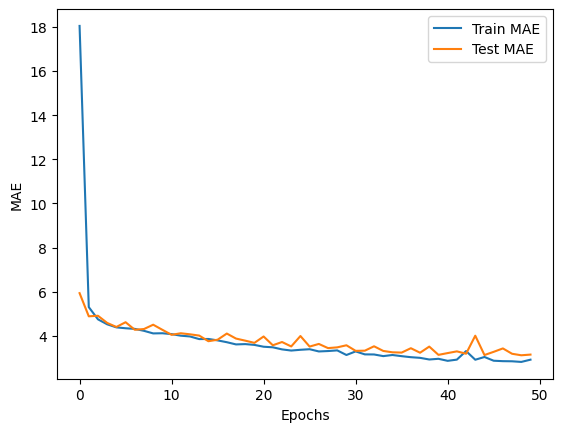

In [ ]:
predicciones_reg = model_regression.predict(X_test)
plt.plot(history_regression.history['mae'], label='Train MAE')
plt.plot(history_regression.history['val_mae'], label='Test MAE') #
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

In [ ]:
print(f'\nPredicciones (primeros 5): {predicciones_reg[:5].flatten()}')
print(f'Reales (primeros 5): {y_test[:5]}')


Predicciones (primeros 5): [19.525805 40.18006  20.305937 17.920582 27.715416]
Reales (primeros 5): [17.41536553 42.03995319 17.53104456 18.17867036 24.16326531]


# Regresión Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dividir entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Probar múltiples valores de profundidad
depths = range(1, 21)
mean_mae = []
std_mae = []

for depth in depths:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(
        regressor,
        X_train,
        y_train,
        cv=KFold(10, shuffle=True, random_state=42),
        scoring=make_scorer(mean_absolute_error, greater_is_better=False)
    )
    mean_mae.append(-np.mean(scores)) # positivo para interpretarlo como pérdida
    std_mae.append(np.std(scores))

In [ ]:
# Mostrar resultados
for d, m, s in zip(depths, mean_mae, std_mae):
    print(f"Profundidad: {d} -> MAE: {m:.3f} (+/- {s:.5f})")

Profundidad: 1 -> MAE: 5.718 (+/- 0.42787)
Profundidad: 2 -> MAE: 5.365 (+/- 0.27632)
Profundidad: 3 -> MAE: 4.693 (+/- 0.14970)
Profundidad: 4 -> MAE: 4.135 (+/- 0.13519)
Profundidad: 5 -> MAE: 3.797 (+/- 0.19740)
Profundidad: 6 -> MAE: 3.582 (+/- 0.19213)
Profundidad: 7 -> MAE: 3.476 (+/- 0.25854)
Profundidad: 8 -> MAE: 3.346 (+/- 0.26488)
Profundidad: 9 -> MAE: 3.111 (+/- 0.31895)
Profundidad: 10 -> MAE: 2.986 (+/- 0.32032)
Profundidad: 11 -> MAE: 2.981 (+/- 0.34192)
Profundidad: 12 -> MAE: 2.977 (+/- 0.36276)
Profundidad: 13 -> MAE: 2.932 (+/- 0.40381)
Profundidad: 14 -> MAE: 2.918 (+/- 0.33592)
Profundidad: 15 -> MAE: 2.897 (+/- 0.35425)
Profundidad: 16 -> MAE: 2.913 (+/- 0.36164)
Profundidad: 17 -> MAE: 2.919 (+/- 0.38172)
Profundidad: 18 -> MAE: 2.860 (+/- 0.31706)
Profundidad: 19 -> MAE: 2.881 (+/- 0.29248)
Profundidad: 20 -> MAE: 2.928 (+/- 0.34083)



 Mejor profundidad según CV: 18 con MAE: 2.860


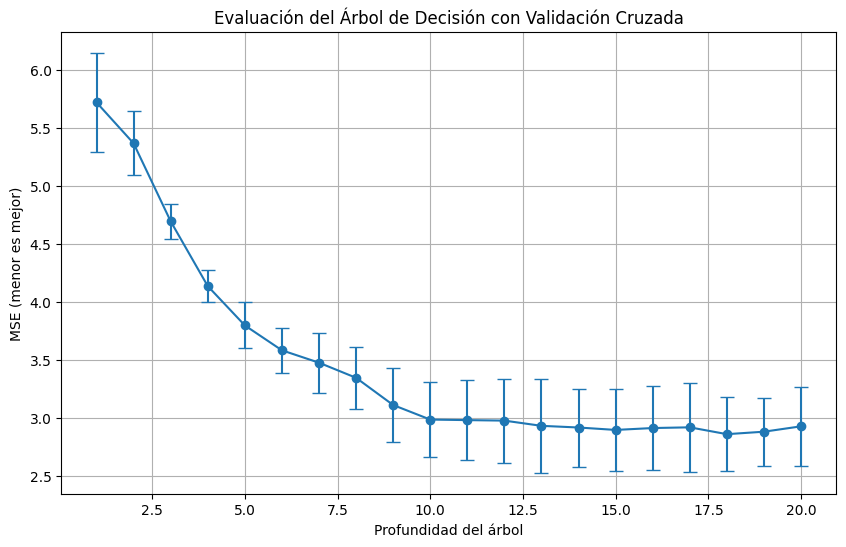

In [ ]:
 # Elegir la mejor profundidad
best_depth = depths[np.argmin(mean_mae)]
print(f"\n Mejor profundidad según CV: {best_depth} con MAE: {min(mean_mae):.3f}")

# Graficar
plt.figure(figsize=(10,6))
plt.errorbar(depths, mean_mae, yerr=std_mae, fmt='-o', capsize=5)
plt.xlabel('Profundidad del árbol')
plt.ylabel('MSE (menor es mejor)')
plt.title('Evaluación del Árbol de Decisión con Validación Cruzada')
plt.grid(True)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.305779 to fit


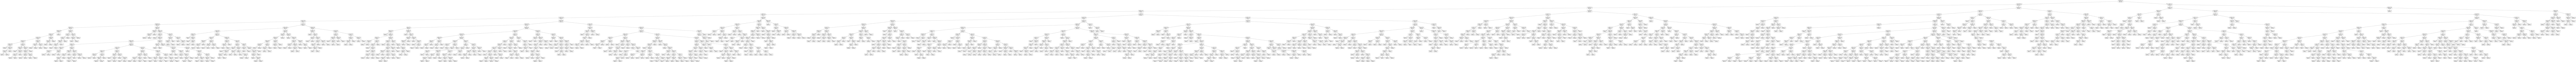

In [ ]:
# Entrenar con mejor profundidad
regressor_final = DecisionTreeRegressor(max_depth=best_depth)
regressor_final.fit(X_train, y_train)

# Visualización
from IPython.display import Image
feature_names = df_seleccionado.columns[:-1]
export_graphviz(regressor_final, out_file='tree_r.dot', feature_names=feature_names)
!dot -Tpng tree_r.dot > tree_r.png
display(Image(filename='tree_r.png'))

In [ ]:
# Predicciones con nuevos datos
datos_nuevos = pd.DataFrame([
    [1.75, 1, 2500, 3, 1, 5, 1, 0, 2],
    [1.60, 0, 1800, 5, 0, 2, 0, 1, 3],
    [1.82, 1, 3000, 1, 2, 7, 1, 0, 1],
], columns=feature_names)

predicciones = regressor_final.predict(datos_nuevos)
print("Predicciones de IMC con datos de prueba:", predicciones)

Predicciones de IMC con datos de prueba: [18.28571429 19.1349481  26.03425031]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


#Tercera entrega: Métodos no supervisados

#Unsupervised PCA

In [ ]:
df_obesity.head()

GENERO  EDAD  ALTURA  PESO  HIS_FAM  C_CALORICA  F_VEG  F_COMIDAS  CAEC  \
0       0  21.0    1.62  64.0        0           0    2.0        3.0     0   
1       0  21.0    1.52  56.0        0           0    3.0        3.0     0   
2       1  23.0    1.80  77.0        0           0    2.0        3.0     0   
3       1  27.0    1.80  87.0        1           0    3.0        3.0     0   
4       1  22.0    1.78  89.8        1           0    2.0        1.0     0   

   FUMA  CH2O  MONI_CAL  F_EJE  T_TEC  F_ALC  M_TRANS  OBESITY_LEVEL  \
0     0   2.0         0    0.0    1.0      0        0              0   
1     1   3.0         1    3.0    0.0      1        0              0   
2     0   2.0         0    2.0    1.0      2        0              0   
3     0   2.0         0    2.0    0.0      2        1              1   
4     0   2.0         0    0.0    0.0      1        0              2   

         IMC  
0  24.386526  
1  24.238227  
2  23.765432  
3  26.851852  
4  28.342381

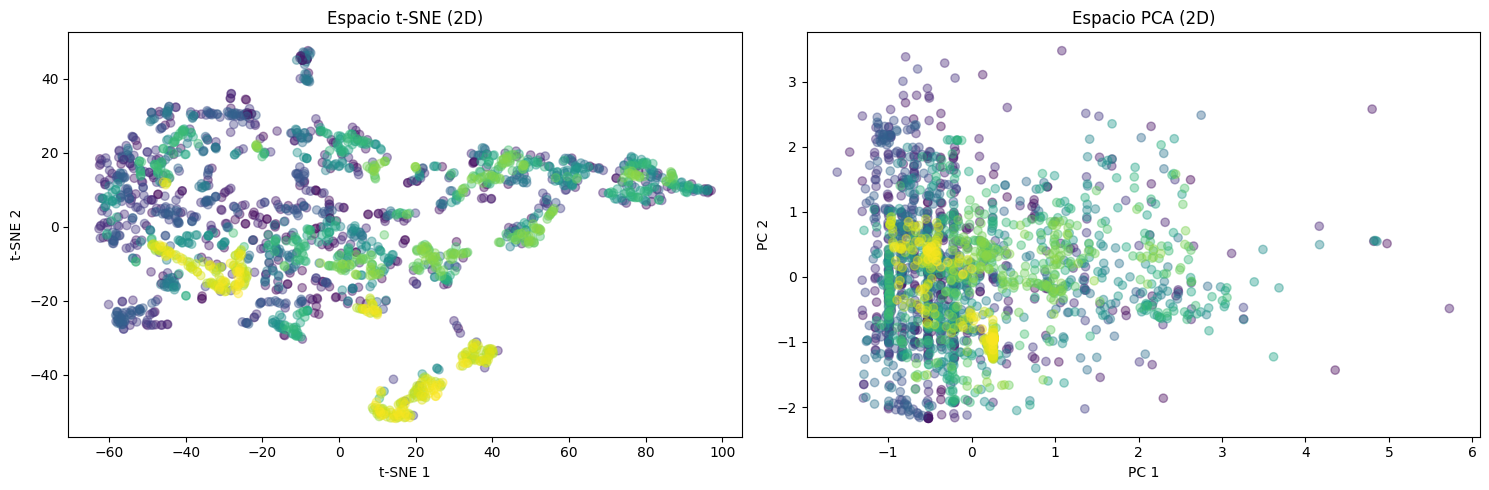

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

# Preparar el dataset
df_seleccionado = df_obesity.drop(columns=['ALTURA', 'PESO', 'IMC'])
X_numeric= df_seleccionado.drop('OBESITY_LEVEL', axis=1)

# PCA
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X_numeric)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_numeric)

# Visualización
plt.figure(figsize=(15, 5))

# t-SNE
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.factorize(y)[0], alpha=0.4, cmap='viridis')
plt.title("Espacio t-SNE (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

# PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], alpha=0.4, cmap='viridis')
plt.title("Espacio PCA (2D)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.tight_layout()
plt.show()


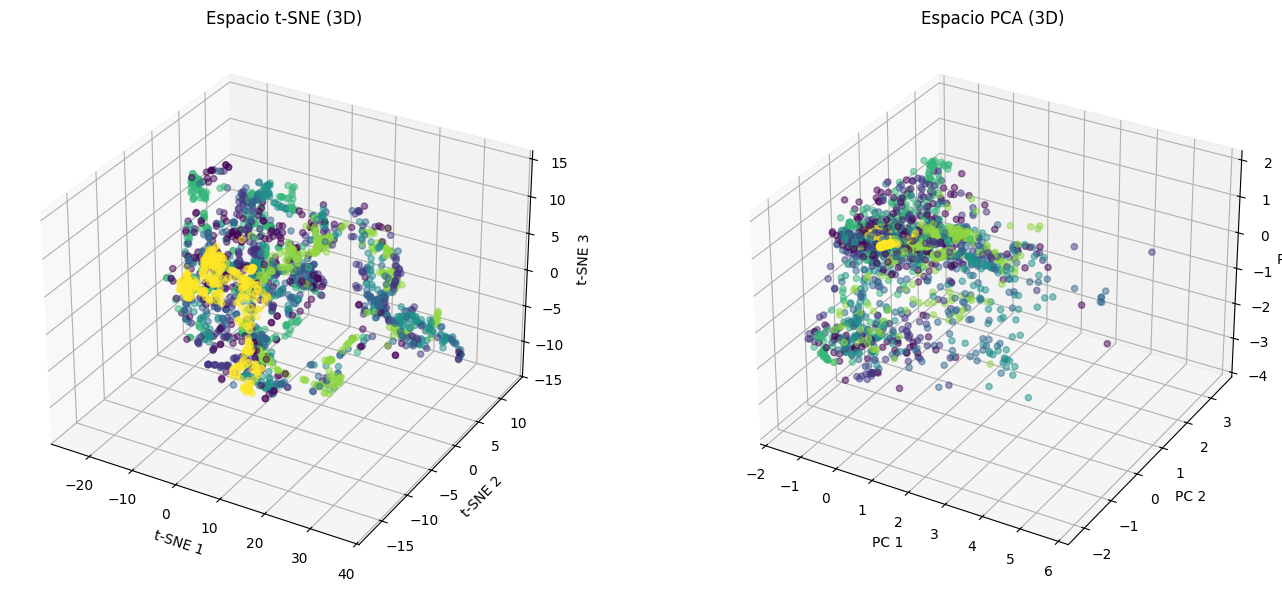

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Habilita proyecciones 3D

# Preparar el dataset
df_seleccionado = df_obesity.drop(columns=['ALTURA', 'PESO', 'IMC'])
X_numeric = df_seleccionado.drop('OBESITY_LEVEL', axis=1)
y = df_seleccionado['OBESITY_LEVEL']

# PCA 3D
pca = PCA(n_components=3, whiten=True)
X_pca = pca.fit_transform(X_numeric)

# t-SNE 3D
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_numeric)

# Visualización 3D
fig = plt.figure(figsize=(15, 6))

# t-SNE
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=pd.factorize(y)[0], alpha=0.5, cmap='viridis')
ax1.set_title("Espacio t-SNE (3D)")
ax1.set_xlabel("t-SNE 1")
ax1.set_ylabel("t-SNE 2")
ax1.set_zlabel("t-SNE 3")

# PCA
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pd.factorize(y)[0], alpha=0.5, cmap='viridis')
ax2.set_title("Espacio PCA (3D)")
ax2.set_xlabel("PC 1")
ax2.set_ylabel("PC 2")
ax2.set_zlabel("PC 3")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Codificar etiquetas
y = df_seleccionado['OBESITY_LEVEL']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División entrenamiento/prueba
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)
X_train_tsne, X_test_tsne, _, _ = train_test_split(X_tsne, y_encoded, test_size=0.2, random_state=42)

# Clasificador
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_tsne = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento
knn_pca.fit(X_train_pca, y_train)
knn_tsne.fit(X_train_tsne, y_train)

# Predicciones
y_pred_pca = knn_pca.predict(X_test_pca)
y_pred_tsne = knn_tsne.predict(X_test_tsne)

# Métricas PCA
print("== PCA ==")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Recall:", recall_score(y_test, y_pred_pca, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_pca, average='weighted'))

# Métricas t-SNE
print("\n== t-SNE ==")
print("Accuracy:", accuracy_score(y_test, y_pred_tsne))
print("Recall:", recall_score(y_test, y_pred_tsne, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_tsne, average='weighted'))


== PCA ==
Accuracy: 0.5460992907801419
Recall: 0.5460992907801419
F1 Score: 0.5401440615614104

== t-SNE ==
Accuracy: 0.7163120567375887
Recall: 0.7163120567375887
F1 Score: 0.7015023028321963


=== KMeans ===
Accuracy: 0.31549028896257697
Recall: 0.31549028896257697
F1 Score: 0.30253821938094005

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.23      0.23       287
           1       0.33      0.13      0.18       290
           2       0.22      0.12      0.15       290
           3       0.24      0.40      0.30       351
           4       0.36      0.40      0.38       272
           5       0.39      0.34      0.36       297
           6       0.45      0.55      0.49       324

    accuracy                           0.32      2111
   macro avg       0.32      0.31      0.30      2111
weighted avg       0.32      0.32      0.30      2111


=== Agglomerative Clustering ===
Accuracy: 0.31454287067740405
Recall: 0.31454287067740405
F1 Score: 0.29317954013869074

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.30      0.23       287
           1       

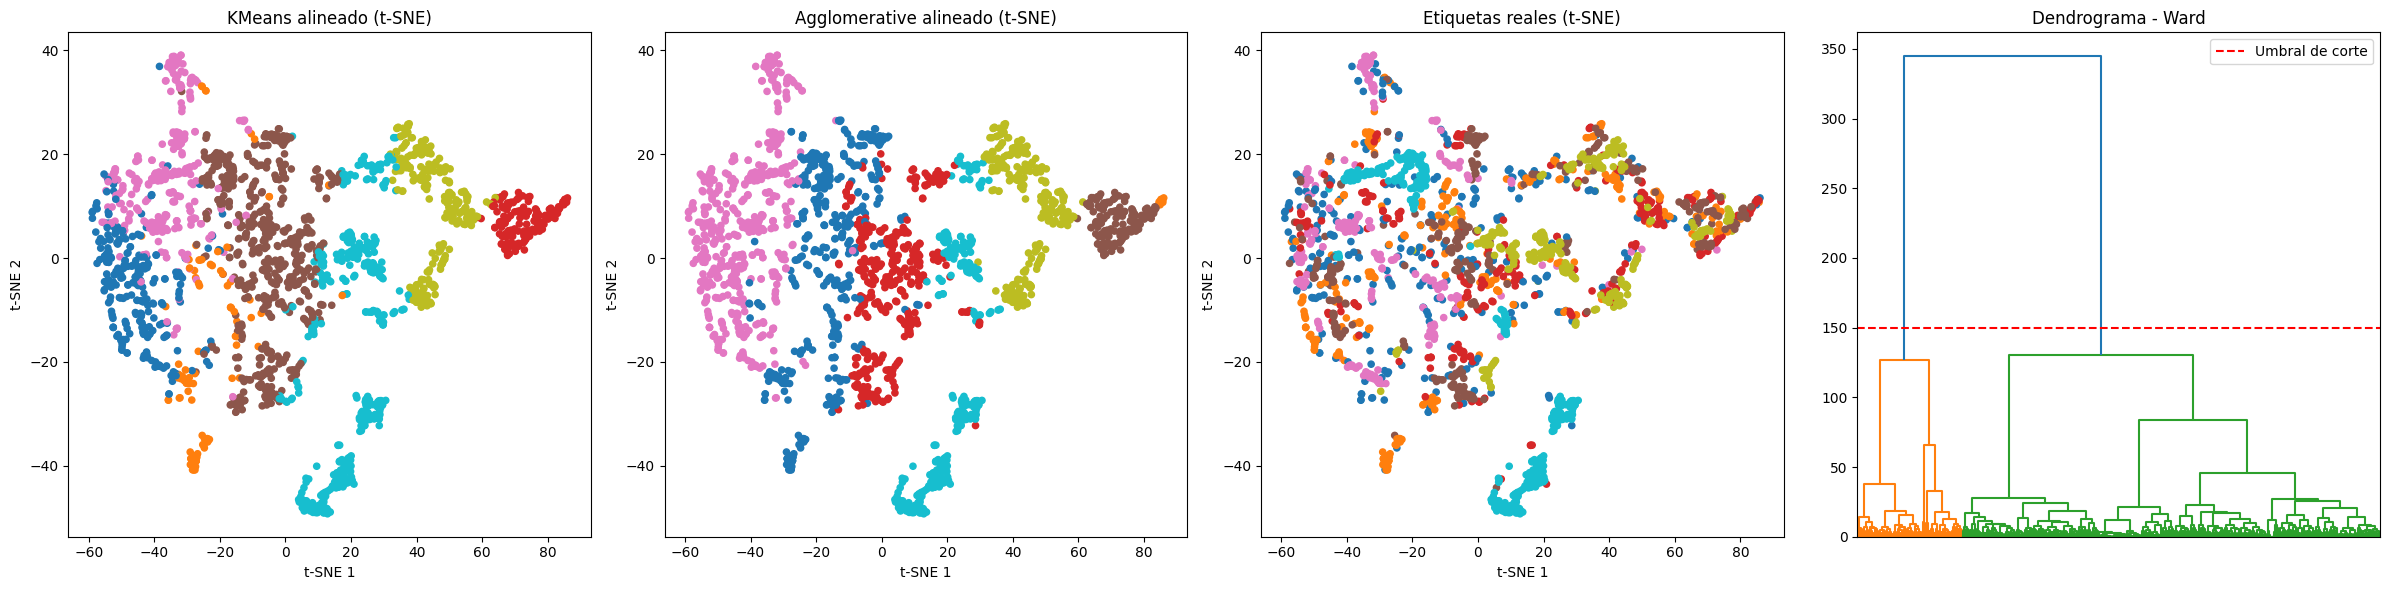

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from scipy.cluster import hierarchy
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import numpy as np

df_seleccionado = df_obesity.drop(columns=['PESO', 'IMC'])
X = df_seleccionado.drop('OBESITY_LEVEL', axis=1)
y_encoded = df_seleccionado['OBESITY_LEVEL']

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
agglo = AgglomerativeClustering(n_clusters=7, linkage='ward')
agglo_labels = agglo.fit_predict(X)

def map_clusters_to_labels(cluster_labels, true_labels):
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)
    new_labels = np.zeros_like(cluster_labels)
    for i, j in zip(col_ind, row_ind):
        new_labels[cluster_labels == i] = j
    return new_labels
#linear_sum_assignment(-conf_matrix): invierte la matriz y busca la asignación óptima (maximiza coincidencias) entre clusters y etiquetas reales.


kmeans_aligned = map_clusters_to_labels(kmeans_labels, y_encoded)
agglo_aligned = map_clusters_to_labels(agglo_labels, y_encoded)

# --- t-SNE ---
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)

# --- Métricas ---
print("=== KMeans ===")
print("Accuracy:", accuracy_score(y_encoded, kmeans_aligned))
print("Recall:", recall_score(y_encoded, kmeans_aligned, average='weighted'))
print("F1 Score:", f1_score(y_encoded, kmeans_aligned, average='weighted'))
print("\nClassification Report:\n", classification_report(y_encoded, kmeans_aligned))

print("\n=== Agglomerative Clustering ===")
print("Accuracy:", accuracy_score(y_encoded, agglo_aligned))
print("Recall:", recall_score(y_encoded, agglo_aligned, average='weighted'))
print("F1 Score:", f1_score(y_encoded, agglo_aligned, average='weighted'))
print("\nClassification Report:\n", classification_report(y_encoded, agglo_aligned))

# --- Dendrograma ---
linkage_matrix = hierarchy.linkage(X, method='ward')

# --- Visualización ---
plt.figure(figsize=(24, 6))

# t-SNE con KMeans alineado
plt.subplot(1, 4, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_aligned, cmap='tab10', s=20)
plt.title('KMeans alineado (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# t-SNE con Agglomerative alineado
plt.subplot(1, 4, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agglo_aligned, cmap='tab10', s=20)
plt.title('Agglomerative alineado (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# t-SNE con etiquetas reales
plt.subplot(1, 4, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='tab10', s=20)
plt.title('Etiquetas reales (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Dendrograma
plt.subplot(1, 4, 4)
hierarchy.dendrogram(linkage_matrix, no_labels=True)
plt.axhline(y=150, color='red', linestyle='--', label='Umbral de corte')
plt.title("Dendrograma - Ward")
plt.legend()

plt.tight_layout()
plt.show()


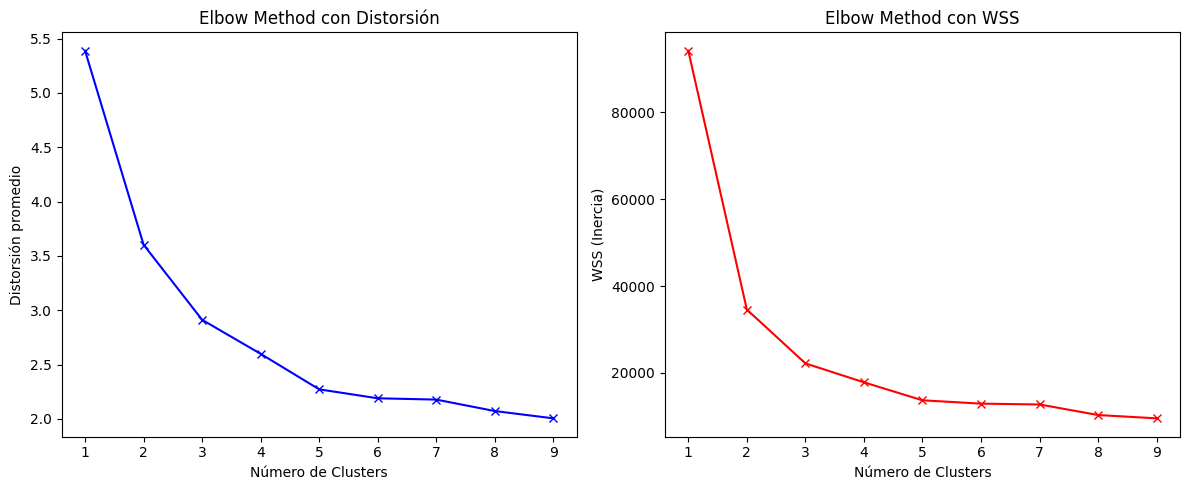

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions = []
wss = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    wss.append(kmeanModel.inertia_)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión promedio')
plt.title('Elbow Method con Distorsión')

plt.subplot(1, 2, 2)
plt.plot(K, wss, 'rx-')
plt.xlabel('Número de Clusters')
plt.ylabel('WSS (Inercia)')
plt.title('Elbow Method con WSS')

plt.tight_layout()
plt.show()
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X)

agglo = AgglomerativeClustering(n_clusters=7, linkage='ward')
agglo_labels = agglo.fit_predict(X)
